In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [287]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [288]:
df1 = pd.read_csv('datasets/uber-raw-data-may14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
652430,5/31/2014 23:45:00,40.7309,-74.0014,B02764
652431,5/31/2014 23:52:00,40.7528,-73.9798,B02764
652432,5/31/2014 23:55:00,40.7158,-73.9519,B02764
652433,5/31/2014 23:56:00,40.6961,-73.8997,B02764
652434,5/31/2014 23:59:00,40.7393,-73.9919,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [289]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512


# Add 3 columns for day of month, weekday and hour

In [290]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,3,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,3,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,3,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,3,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,3,0


# Plot day of month data as histogram

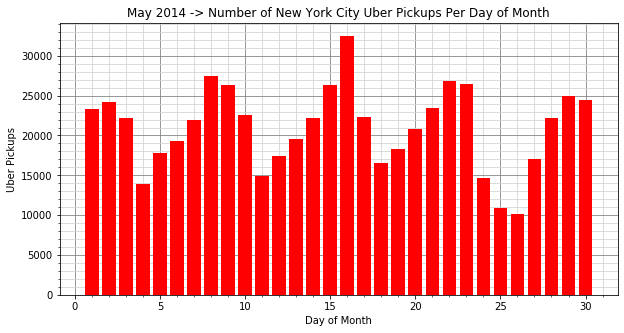

In [291]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('May 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [292]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
26    10202
25    10841
4     13918
24    14651
11    14901
18    16508
27    17004
12    17470
5     17859
19    18315
6     19300
13    19498
20    20860
31    21261
7     21891
14    22218
3     22234
28    22240
17    22294
10    22550
1     23375
21    23508
2     24235
30    24413
29    24930
15    26301
9     26385
23    26465
22    26802
8     27513
16    32493
dtype: int64

# Plot data 'by_dom_sorted' as line graph

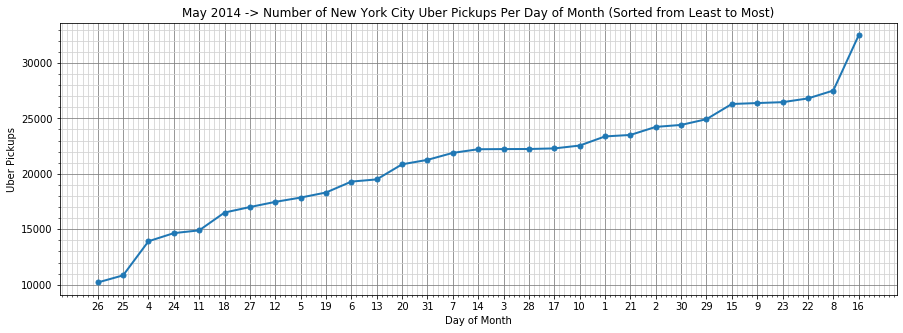

In [293]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(0,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(0, 31), by_dom_sorted.index)

plt.title('May 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


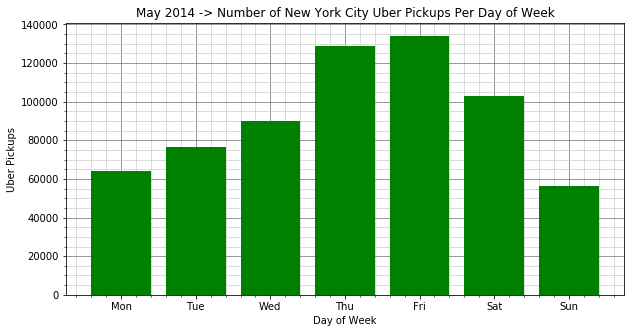

In [294]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('May 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

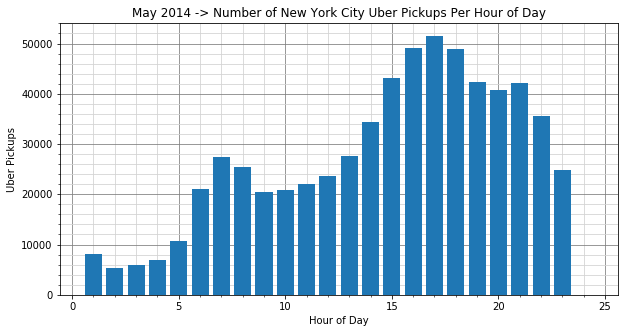

In [295]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('May 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [296]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,767,466,304,627,977,1514,2688,3287,3012,2294,...,3821,4514,5055,5466,4237,3654,3715,3681,2435,1429
1,715,431,303,543,864,1631,3416,4401,3616,2647,...,4192,5247,6169,6713,5344,4712,4980,4503,3149,1759
2,838,477,334,573,846,1547,3618,4864,4046,2872,...,5016,6211,7287,7808,7138,5902,6015,5782,3839,2041
3,1426,831,584,849,1291,2425,5080,6697,6318,4550,...,6357,7852,9046,10686,9738,8424,8474,9023,7143,3930
4,2004,1156,758,1005,1286,2025,4327,5665,5072,3806,...,6789,8384,9010,9543,11081,10395,8847,9392,8859,6774
5,3878,2249,1524,1205,958,1027,1203,1588,2144,2579,...,4950,7104,8472,7518,8145,6419,5918,7027,7901,7416
6,4247,2576,1565,1144,723,620,683,911,1252,1759,...,3238,3775,4088,3774,3282,2881,2782,2809,2230,1487


# Plot df2 as heatmap

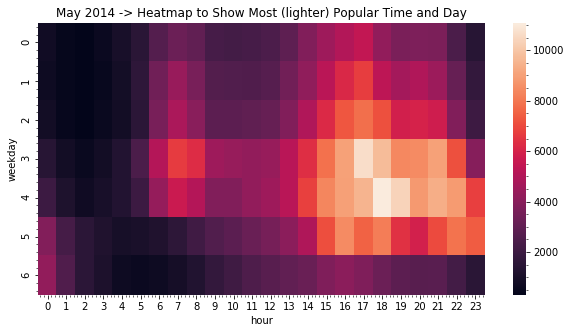

In [297]:
ax = sb.heatmap(df2)

ax.set_title("May 2014 -> Heatmap to Show Most (lighter) Popular Time and Day");

# Plot latitude and longitude data on same graph

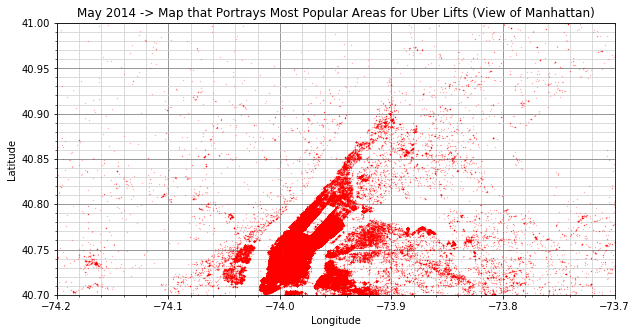

In [298]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('May 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')